# **Report**

The first thing I tried to do with the provided code was to execute it.
Then, with a CNN composed by:

- a convolution layer of shape (3,18) (it means the input shape is 3 and the output is 18) with kernel_size=3, strides=1 and padding=1
- a reLu layer
- a Maxpooling layer with kernel_size=2, strides=2 and padding=0
- 2 fully-connected layers with an intermediate size of 64

we got an accuracy around 62% (with a batch_size of 32, 10 epochs and a learning rate equals to 0.001) which not enough for being satisfiable regarding the nowadays performances of some CNN.

Then, I simply tried to add some new layers like in the following code:


In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        self.conv12= nn.Conv2d(18,18,kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(18,36,kernel_size=5,stride=1,padding=2)
        self.conv3 = nn.Conv2d(36,72,kernel_size=5,stride=1,padding=2)
        self.conv4 = nn.Conv2d(72,144,kernel_size=3,stride=1,padding=1)
        self.conv5 = nn.Conv2d(144,144,kernel_size=3,stride=1,padding=1)
        # Size of the output of the last convolution:
        self.flattened_size = 144 * 4 * 4
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv12(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

With this convolutionnal network and the same parameters for training (batch_size=32, n_epochs=10, learning_rate=0.001) I got an accuracy around 72% which is quite better than before. However, I could see thanks to the curves of training losses and validations losses that I was overfitting since the fifth epoch.

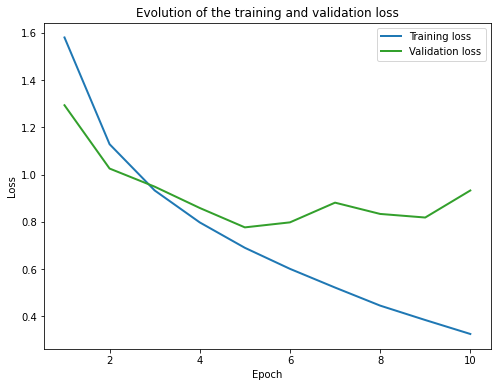

Then, I decided to modify the learning rate to avoid this overfitting. If if was increasing the learning rate, the network wasn't able to learn because it was always missing the local minimas. I the opposite, with a lower learning rate (for example 0.0001), the network looked like it could go further but the computational time was increasing so much. 
Then, i decided to modify the learning rate since the 4th epoch. Indeed, as I can see in the previous graph, the loss seems to decrease till the 5th epoch. Then, I made a change in order that during the 3 first epochs, the learning rate would be equal to 0.001 and since the forth epoch, it would be equal to 0.0001.  
In order to do that, I just added the following code in the *train* function.

In [ ]:
if (epoch==4): # divide the learning rate by 10 when we reach epoch = 4
  criterion, optimizer = createLossAndOptimizer(net, learning_rate/10)

Thanks to that, I obtained the following results with an accuracy of 75%.

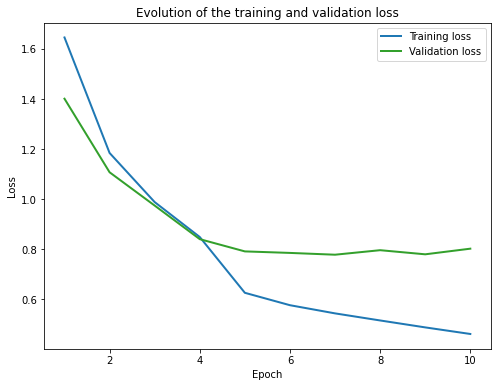

I also tried to add some intemediate layers for my CNN as the following architecture which resulted in a accuracy around 69% which worse than the previous CNN.

In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv12= nn.Conv2d(18,18,kernel_size=3,stride=1,padding=1)
        self.conv21 = nn.Conv2d(18,36,kernel_size=5,stride=1,padding=2)
        self.conv22 = nn.Conv2d(36,36,kernel_size=5,stride=1,padding=2)
        self.conv31 = nn.Conv2d(36,72,kernel_size=5,stride=1,padding=2)
        self.conv32 = nn.Conv2d(72,72,kernel_size=5,stride=1,padding=2)
        self.conv41 = nn.Conv2d(72,144,kernel_size=3,stride=1,padding=1)
        self.conv42 = nn.Conv2d(144,144,kernel_size=3,stride=1,padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        # Size of the output of the last convolution:
        self.flattened_size = 144 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv12(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        x = F.relu(self.conv21(x))
        x = F.relu(self.conv22(x))
        x = self.pool(x)
        x = F.relu(self.conv31(x))
        x = F.relu(self.conv32(x))
        x = self.pool(x)
        x = F.relu(self.conv41(x))
        x = F.relu(self.conv42(x))
        x = self.pool(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

I tried to modify the kernel size of my convolutional layers because the kernel was changing as the layer size was. Then, the ratio of kernel/layer_size was the same. That would lead to convolutions which highlight the same kind of details of the image.  Then, I put all the kernel size to be equal to be while the layer size was still decreasing. I also kept the batch_size to 32, the learning rate to 0.001 until the forth epoch and 0.0001 after. The number of epoch has been set to 15. We got the following results.

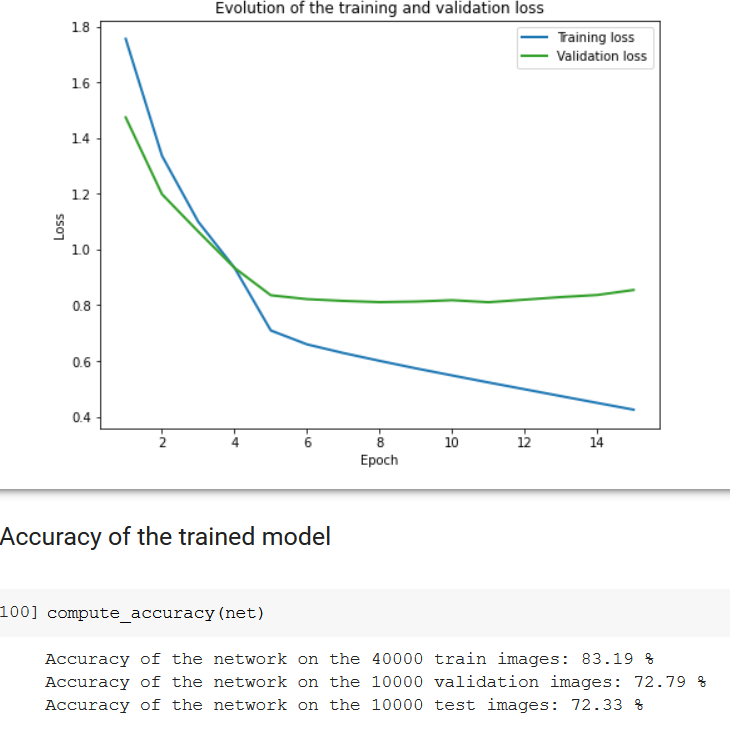

The CNN configuration was the following one:

In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv12= nn.Conv2d(18,18,kernel_size=3,stride=1,padding=1)
        self.conv21 = nn.Conv2d(18,36,kernel_size=3,stride=1,padding=1)
        self.conv22 = nn.Conv2d(36,36,kernel_size=3,stride=1,padding=1)
        self.conv31 = nn.Conv2d(36,72,kernel_size=3,stride=1,padding=1)
        self.conv32 = nn.Conv2d(72,72,kernel_size=3,stride=1,padding=1)
        self.conv41 = nn.Conv2d(72,144,kernel_size=3,stride=1,padding=1)
        self.conv42 = nn.Conv2d(144,144,kernel_size=3,stride=1,padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        # Size of the output of the last convolution:
        self.flattened_size = 144 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv12(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        x = F.relu(self.conv21(x))
        x = F.relu(self.conv22(x))
        x = self.pool(x)
        x = F.relu(self.conv31(x))
        x = F.relu(self.conv32(x))
        x = self.pool(x)
        x = F.relu(self.conv41(x))
        x = F.relu(self.conv42(x))
        x = self.pool(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

Since the results weren't that satisfying (around 72%) I decided to train the same network with a different batch size. In a first time, I set it to 16. The results weren't better:

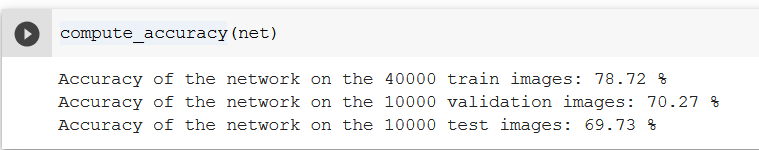

With a smaller batch size, the result is still worse: we have a 70% accuracy for a batch size of 8.

Then ,I tried to train with bigger batch sizes to see what happens: 

With a batch size of 64, I got an accuracy of 72,90%

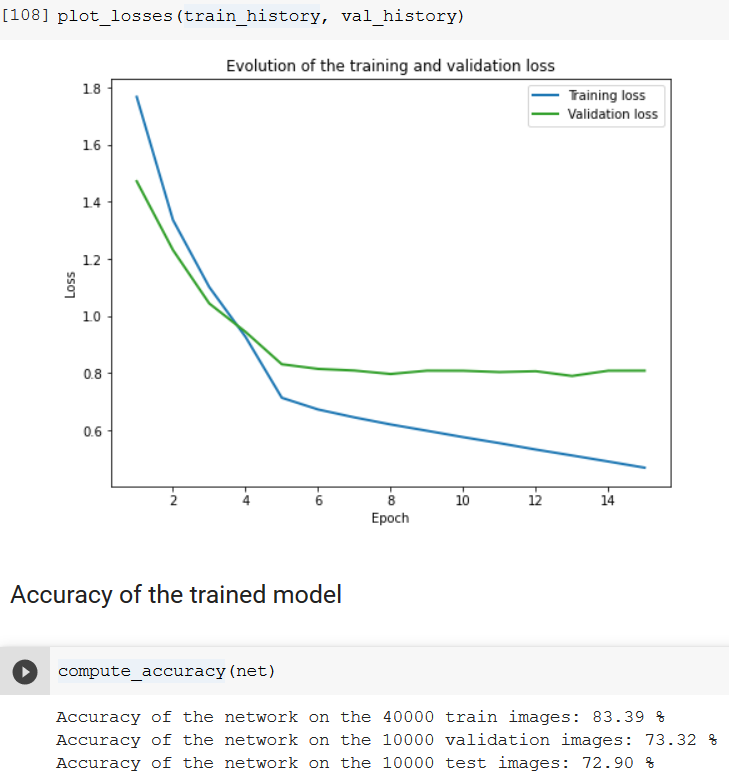

With a batch size of 128, I get the following results (I've only changed the n° epoch to 25):
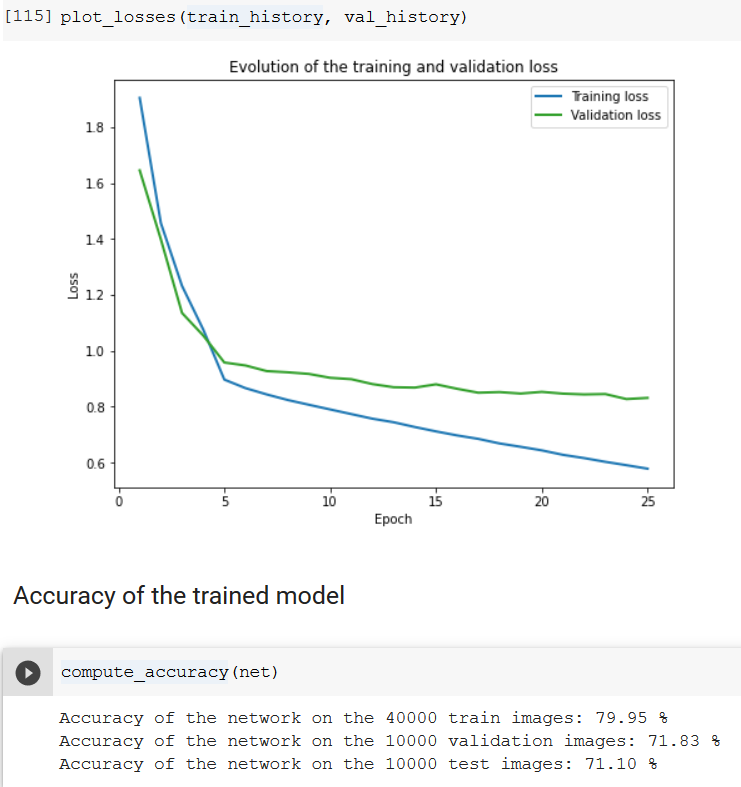

It seems that, the bigger batch size I put, we longer the network is to optimize its loss. Which is understandable because we update the network after each learning on a batch. Then, for one epoch, we have less updates. On the other hand, theses gradient descent are more precise because they take into account more data. 

Then, I reduced the number of epoch to 10 but I kept the learning rate to 0.001 instead of changing it at the 4th epoch.

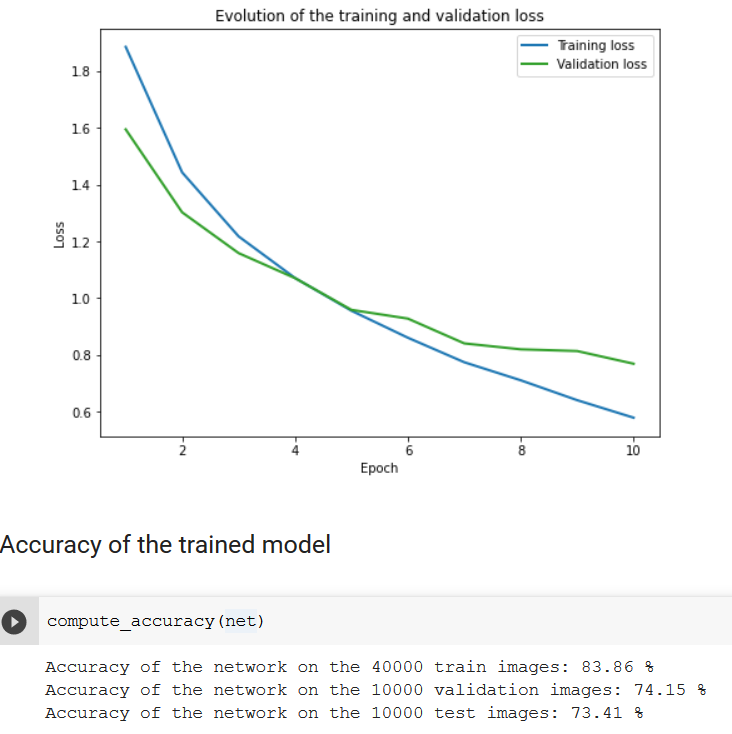

I also tried to use my "learning rate trick" since the 10th epoch for this architecture and to train till the 12th epoch. This leads me to the following result which are similar to the best I managed to get at the moment:

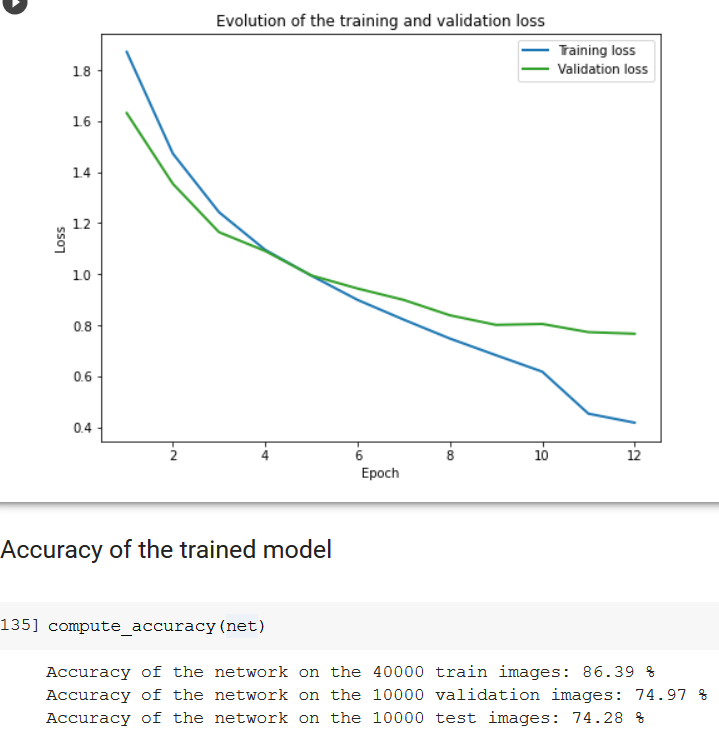

Seeing that the results weren't much better. I tried an other architecture with layers being wider:

In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv12= nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1)
        self.conv21 = nn.Conv2d(16,64,kernel_size=3,stride=1,padding=1)
        self.conv22 = nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1)
        self.conv31 = nn.Conv2d(64,256,kernel_size=3,stride=1,padding=1)
        self.conv32 = nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1)
        self.conv41 = nn.Conv2d(256,1024,kernel_size=3,stride=1,padding=1)
        self.conv42 = nn.Conv2d(1024,1024,kernel_size=3,stride=1,padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        # Size of the output of the last convolution:
        self.flattened_size = 1024 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv12(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        x = F.relu(self.conv21(x))
        x = F.relu(self.conv22(x))
        x = self.pool(x)
        x = F.relu(self.conv31(x))
        x = F.relu(self.conv32(x))
        x = self.pool(x)
        x = F.relu(self.conv41(x))
        x = F.relu(self.conv42(x))
        x = self.pool(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

I trained this network with the following parameters: learning rate= 0.0005 patch size = 128 and n_epoch = 10
Then I got these results:

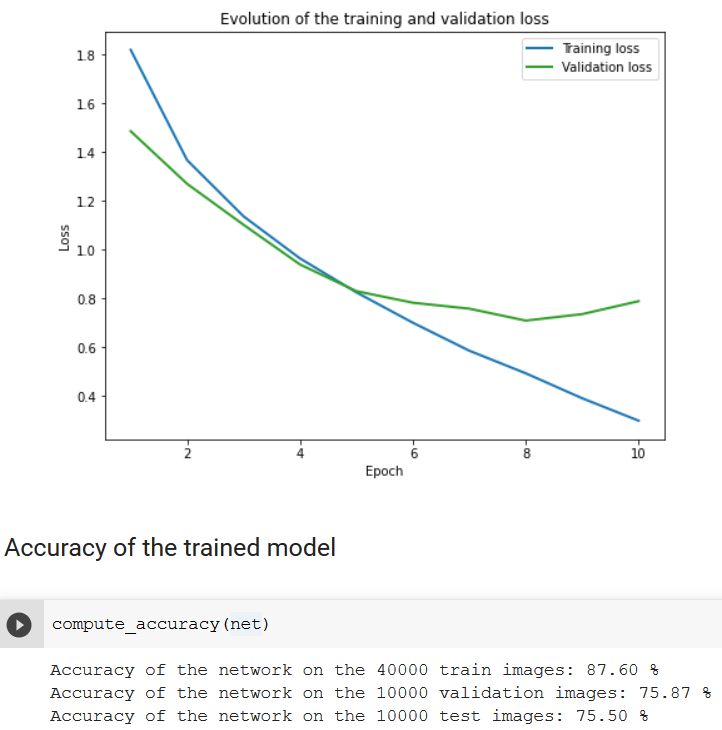

I finally tried to use a trick seen during the lecture which is to skip some convolutionnal layers with the following code:

In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        self.conv12= nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1)
        self.conv21 = nn.Conv2d(16,64,kernel_size=3,stride=1,padding=1)
        self.conv22 = nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1)
        self.conv31 = nn.Conv2d(64,256,kernel_size=3,stride=1,padding=1)
        self.conv32 = nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1)
        self.conv41 = nn.Conv2d(256,1024,kernel_size=3,stride=1,padding=1)
        self.conv42 = nn.Conv2d(1024,1024,kernel_size=3,stride=1,padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        # Size of the output of the last convolution:
        self.flattened_size = 1024 * 2 * 2
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv12(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        x0 = F.relu(self.conv21(x))
        x = F.relu(self.conv22(x0))
        x = self.pool(x+x0)
        x1 = F.relu(self.conv31(x))
        x = F.relu(self.conv32(x1))
        x = self.pool(x+x1)
        x2 = F.relu(self.conv41(x))
        x = F.relu(self.conv42(x2))
        x = self.pool(x+x2)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

Then, I trained my network with the same parameters as before, which means: learning_rate=0.001, n_epoch=10 and batch_size=128.

And I got the following results that are a few better:

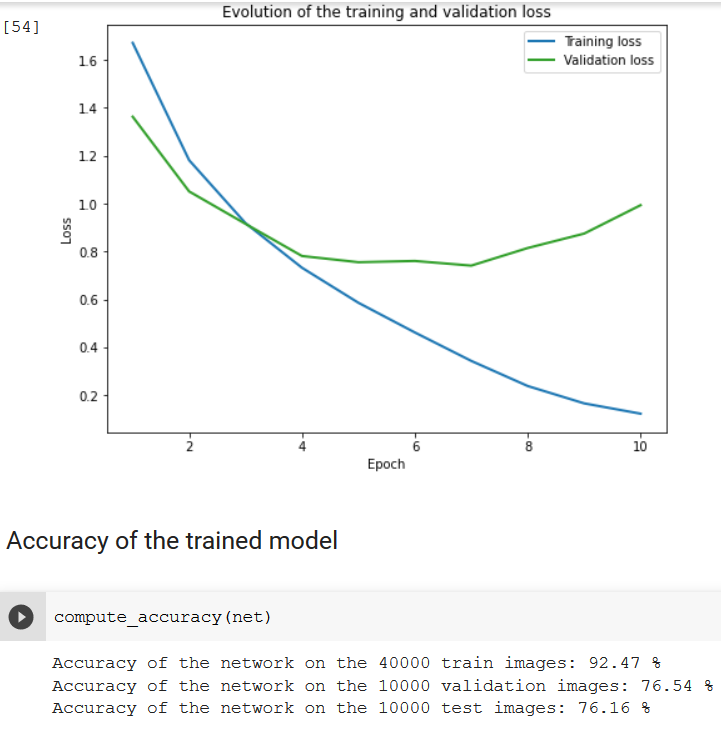

I didn't go further in the training because we can see that the two losses were diverging, which means I'm starting to overfit my train data.


An idea to increase the accuracy of my networks could be to do some data augmentation. It's a kind a processing which consist in applying several transformations to the data and add these transfromed data to the training data. Thanks to that, we have more data to be trained on and then, the network may be better because the accuracy for a network increase with the quantity of data.